# IMPORTING DATA AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#from google.colab import files
#uploaded=files.upload()
data_in=pd.read_csv("high_diamond_ranked_10min.csv")
data_in 

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
data_in.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# FEATURE ENGINEERING

In [ ]:
data2=data_in[['gameId','blueWins','redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]
data2


,gameId,blueWins,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,46,3,0,4,7,7,0,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,12,21,1,4,6,3,0,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,14,0,1,7,6,11,1,1,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,66,4,0,3,2,1,0,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
data2.columns=['gameId','blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']
data2

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,46,3,0,4,7,7,0,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,12,21,1,4,6,3,0,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,14,0,1,7,6,11,1,1,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,66,4,0,3,2,1,0,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
data1=data_in[['gameId','blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']]
data1

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [ ]:
type(data1['blueWins'][0])

numpy.int64

In [ ]:
#data=data[['blueWins'==1]]
data1=data1.loc[data1['blueWins'] == 1]
data1

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15899,7.0,18161,225,42,698,101,22.5,1589.9
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,17865,7.4,19102,238,53,3274,1659,23.8,1786.5
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,15722,6.8,17896,224,51,-470,-187,22.4,1572.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,17155,7.0,18002,231,36,756,1,23.1,1715.5
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8


In [ ]:
data=data2.append(data1)
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,17155,7.0,18002,231,36,756,1,23.1,1715.5
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8


# DATA RESEARCH AND PRE-PROCESSING

In [ ]:
data.describe()
data.columns
#data=data.drop("gameId", axis=1)
data.reindex()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,17155,7.0,18002,231,36,756,1,23.1,1715.5
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8


In [ ]:

data.columns = data.columns.str.replace('blue', 'b_r_')
data

,gameId,b_r_Wins,b_r_WardsPlaced,b_r_WardsDestroyed,b_r_FirstBlood,b_r_Kills,b_r_Deaths,b_r_Assists,b_r_EliteMonsters,b_r_Dragons,...,b_r_TowersDestroyed,b_r_TotalGold,b_r_AvgLevel,b_r_TotalExperience,b_r_TotalMinionsKilled,b_r_TotalJungleMinionsKilled,b_r_GoldDiff,b_r_ExperienceDiff,b_r_CSPerMin,b_r_GoldPerMin
0,4519157822,0,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,17155,7.0,18002,231,36,756,1,23.1,1715.5
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8


In [ ]:
data.isnull().sum()

gameId                          0
b_r_Wins                        0
b_r_WardsPlaced                 0
b_r_WardsDestroyed              0
b_r_FirstBlood                  0
b_r_Kills                       0
b_r_Deaths                      0
b_r_Assists                     0
b_r_EliteMonsters               0
b_r_Dragons                     0
b_r_Heralds                     0
b_r_TowersDestroyed             0
b_r_TotalGold                   0
b_r_AvgLevel                    0
b_r_TotalExperience             0
b_r_TotalMinionsKilled          0
b_r_TotalJungleMinionsKilled    0
b_r_GoldDiff                    0
b_r_ExperienceDiff              0
b_r_CSPerMin                    0
b_r_GoldPerMin                  0
dtype: int64

# STATISTICAL ANALYSIS

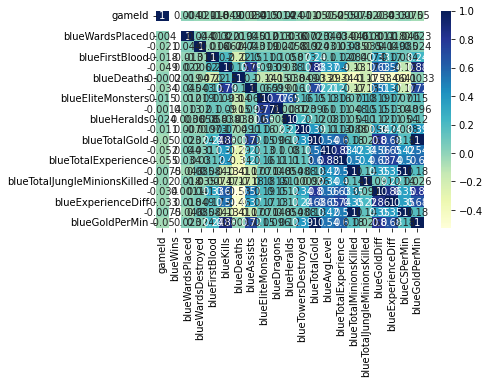

In [ ]:
cor1=data1.corr()
dataplot1 = sb.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
from google.colab import files
cor1.to_csv('corr1.csv')
files.download("corr1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

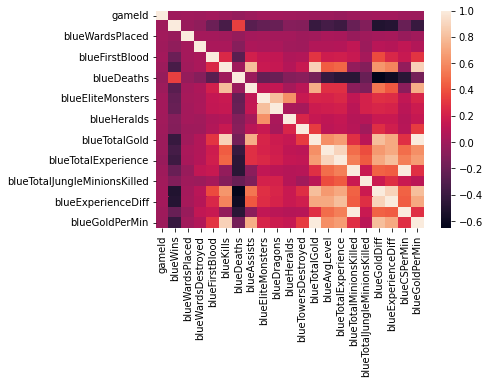

In [ ]:
cor2=data2.corr()
dataplot2 = sb.heatmap(cor2, annot=False)
plt.show()

In [ ]:
from google.colab import files
cor2.to_csv('corr2.csv')
files.download("corr2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

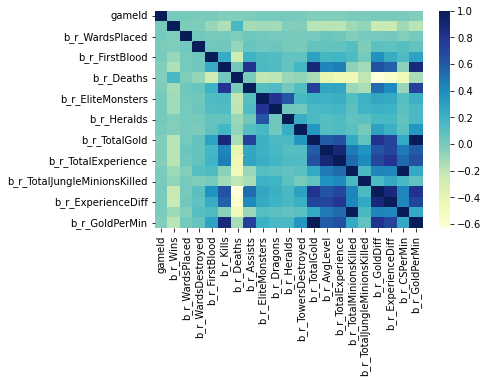

gameId                          0.000927
b_r_Wins                        1.000000
b_r_WardsPlaced                -0.018011
b_r_WardsDestroyed             -0.017242
b_r_FirstBlood                 -0.090639
b_r_Kills                      -0.150382
b_r_Deaths                      0.161953
b_r_Assists                    -0.124542
b_r_EliteMonsters              -0.111034
b_r_Dragons                    -0.122652
b_r_Heralds                    -0.026143
b_r_TowersDestroyed            -0.028819
b_r_TotalGold                  -0.183484
b_r_AvgLevel                   -0.175692
b_r_TotalExperience            -0.190247
b_r_TotalMinionsKilled         -0.105391
b_r_TotalJungleMinionsKilled   -0.066794
b_r_GoldDiff                   -0.240801
b_r_ExperienceDiff             -0.242686
b_r_CSPerMin                   -0.105391
b_r_GoldPerMin                 -0.183484
Name: b_r_Wins, dtype: float64

In [ ]:
cor=data.corr()
dataplot = sb.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()
val=cor['b_r_Wins']
val

In [ ]:
cor
from google.colab import files
cor.to_csv('corre.csv')
files.download("corre.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def col_filter():
    col_in=[]
    col_ot=[]
    x=0
    for i in val:
        if i<=0.15 and i>0:
            col_in.append(val.index[x])
        elif i<0 and i>=-0.15:
            col_in.append(val.index[x])
        else:
            col_ot.append(val.index[x])
        x=x+1   
    return col_in
col_filter()

['gameId',
 'b_r_WardsPlaced',
 'b_r_WardsDestroyed',
 'b_r_FirstBlood',
 'b_r_Assists',
 'b_r_EliteMonsters',
 'b_r_Dragons',
 'b_r_Heralds',
 'b_r_TowersDestroyed',
 'b_r_TotalMinionsKilled',
 'b_r_TotalJungleMinionsKilled',
 'b_r_CSPerMin']

In [ ]:
colums_dp=col_filter()
d_cl=data.drop(colums_dp, axis=1)
d_cl

,b_r_Wins,b_r_Kills,b_r_Deaths,b_r_TotalGold,b_r_AvgLevel,b_r_TotalExperience,b_r_GoldDiff,b_r_ExperienceDiff,b_r_GoldPerMin
0,0,6,9,16567,6.8,17047,-643,8,1656.7
1,0,5,5,17620,6.8,17438,2908,1173,1762.0
2,0,11,7,17285,6.8,17254,1172,1033,1728.5
3,0,5,4,16478,7.0,17961,1321,7,1647.8
4,0,6,6,17404,7.0,18313,1004,-230,1740.4
...,...,...,...,...,...,...,...,...,...
9872,1,7,7,17155,7.0,18002,756,1,1715.5
9873,1,12,6,18573,7.2,19391,2639,2364,1857.3
9874,1,7,4,17765,7.2,18967,2519,2469,1776.5
9875,1,6,4,16238,7.2,19255,782,888,1623.8


In [ ]:
d_cl.columns

Index(['b_r_Wins', 'b_r_Kills', 'b_r_Deaths', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_GoldPerMin'],
      dtype='object')

In [ ]:
x_em=d_cl
y_be=data.b_r_EliteMonsters
x_em.head()

,b_r_Wins,b_r_Kills,b_r_Deaths,b_r_TotalGold,b_r_AvgLevel,b_r_TotalExperience,b_r_GoldDiff,b_r_ExperienceDiff,b_r_GoldPerMin
0,0,6,9,16567,6.8,17047,-643,8,1656.7
1,0,5,5,17620,6.8,17438,2908,1173,1762.0
2,0,11,7,17285,6.8,17254,1172,1033,1728.5
3,0,5,4,16478,7.0,17961,1321,7,1647.8
4,0,6,6,17404,7.0,18313,1004,-230,1740.4


# MODELLING BASED ON CORRELATION

# ELITE MONSTERS RECOMMENDER SYSTEM MODEL

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

dtree = DecisionTreeClassifier()
X_emtrain, X_emtest, y_emtrain, y_emtest = train_test_split(x_em, y_be, test_size=0.30, random_state=25) 
dtree = dtree.fit(X_emtrain, y_emtrain)
Y_pred = dtree.predict(X_emtest)
print("Accuracy:",metrics.accuracy_score(Y_pred, y_emtest))

Accuracy: 0.450371370695476


In [ ]:
data
from google.colab import files
data.to_csv('up_data.csv')
files.download("up_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns

Index(['gameId', 'b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed',
       'b_r_FirstBlood', 'b_r_Kills', 'b_r_Deaths', 'b_r_Assists',
       'b_r_EliteMonsters', 'b_r_Dragons', 'b_r_Heralds',
       'b_r_TowersDestroyed', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin'],
      dtype='object')

# DRAGONS RECOMMENDER SYSTEM MODEL

In [ ]:
#dr_cl=data.drop(colums_dp, axis=1)
x_d=d_cl
y_d=data.b_r_Dragons
y_d
dtree = DecisionTreeClassifier()
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(x_d, y_d, test_size=0.30, random_state=30) 
dtree = dtree.fit(X_dtrain, y_dtrain)
Y_dpred = dtree.predict(X_dtest)
print("Accuracy:",metrics.accuracy_score(y_dtest, Y_dpred))

Accuracy: 0.5340985820391627


HEARALDS RECOMMENDER SYSTEM FOR COORELATION

In [ ]:
data.columns

Index(['gameId', 'b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed',
       'b_r_FirstBlood', 'b_r_Kills', 'b_r_Deaths', 'b_r_Assists',
       'b_r_EliteMonsters', 'b_r_Dragons', 'b_r_Heralds',
       'b_r_TowersDestroyed', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin'],
      dtype='object')

In [ ]:
x_he=data[['gameId', 'b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed',
       'b_r_FirstBlood', 'b_r_Kills', 'b_r_Deaths', 'b_r_Assists',
       'b_r_EliteMonsters', 'b_r_Dragons', 'b_r_Heralds',
       'b_r_TowersDestroyed', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin']]
y_he=data.b_r_Heralds 
dhtree = DecisionTreeClassifier()
X_htrain, X_htest, y_htrain, y_htest = train_test_split(x_he, y_he, test_size=0.30, random_state=30) 
dhtree = dhtree.fit(X_htrain, y_htrain)
Y_hpred = dhtree.predict(X_htest)
print("Accuracy:",metrics.accuracy_score(y_htest, Y_hpred))

Accuracy: 1.0


In [ ]:
data.tail()

,gameId,b_r_Wins,b_r_WardsPlaced,b_r_WardsDestroyed,b_r_FirstBlood,b_r_Kills,b_r_Deaths,b_r_Assists,b_r_EliteMonsters,b_r_Dragons,...,b_r_TowersDestroyed,b_r_TotalGold,b_r_AvgLevel,b_r_TotalExperience,b_r_TotalMinionsKilled,b_r_TotalJungleMinionsKilled,b_r_GoldDiff,b_r_ExperienceDiff,b_r_CSPerMin,b_r_GoldPerMin
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,17155,7.0,18002,231,36,756,1,23.1,1715.5
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,16266,7.0,17321,207,44,927,-58,20.7,1626.6


In [ ]:
data.columns

Index(['gameId', 'b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed',
       'b_r_FirstBlood', 'b_r_Kills', 'b_r_Deaths', 'b_r_Assists',
       'b_r_EliteMonsters', 'b_r_Dragons', 'b_r_Heralds',
       'b_r_TowersDestroyed', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin'],
      dtype='object')

In [ ]:
data=data.drop('gameId',axis=1)
data.head()

,b_r_Wins,b_r_WardsPlaced,b_r_WardsDestroyed,b_r_FirstBlood,b_r_Kills,b_r_Deaths,b_r_Assists,b_r_EliteMonsters,b_r_Dragons,b_r_Heralds,b_r_TowersDestroyed,b_r_TotalGold,b_r_AvgLevel,b_r_TotalExperience,b_r_TotalMinionsKilled,b_r_TotalJungleMinionsKilled,b_r_GoldDiff,b_r_ExperienceDiff,b_r_CSPerMin,b_r_GoldPerMin
0,0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
col_p=['b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed',
       'b_r_FirstBlood', 'b_r_Kills', 'b_r_Deaths', 'b_r_Assists',
        'b_r_Dragons', 'b_r_Heralds',
       'b_r_TowersDestroyed', 'b_r_TotalGold', 'b_r_AvgLevel',
       'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin']
X_p=data.drop('b_r_EliteMonsters',axis=1)
y_p=data.b_r_EliteMonsters
X_dp=data.drop('b_r_Dragons', axis=1)
y_dp=data.b_r_Dragons
X_he=data.drop('b_r_Heralds', axis=1)
Y_he=data.b_r_Heralds
X_m=data.drop('b_r_TotalJungleMinionsKilled',axis=1)
Y_m=data.X_m=data.drop('b_r_TotalJungleMinionsKilled',axis=1)


# STANDARD SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
xp_std=pd.DataFrame(StandardScaler().fit_transform(X_p))
xp_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.411496,-0.403970,1.495098,-1.066274,-0.163317,1.085200,0.233527,-0.869168,-0.470704,-0.219616,-0.092432,-0.531761,-0.901997,-1.006977,0.351461,-0.435941,-0.167700,-1.006977,-0.092432
1,-1.411496,-0.569036,-0.833073,0.937845,-0.495355,-0.286959,-1.213260,1.150526,2.124477,3.756286,0.600304,-0.531761,-0.569955,0.981758,0.051957,1.029419,0.449005,0.981758,0.600304
2,-1.411496,-0.403970,0.098195,0.937845,1.496871,0.399121,1.680314,-0.869168,-0.470704,-0.219616,0.379918,-0.531761,-0.726210,-0.729479,-2.344075,0.313039,0.374895,-0.729479,0.379918
3,-1.411496,-0.403970,-0.367439,0.937845,-0.495355,-0.629999,0.715789,-0.869168,-0.470704,-0.219616,-0.150982,0.138667,-0.125817,0.750510,-0.447217,0.374526,-0.168230,0.750510,-0.150982
4,-1.411496,-0.293926,-0.367439,0.937845,-0.163317,0.056081,-0.007604,1.150526,-0.470704,-0.219616,0.458204,0.138667,0.173106,0.288013,1.549476,0.243712,-0.293688,0.288013,0.458204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14804,0.708468,-0.569036,-1.298707,0.937845,0.168721,0.399121,0.474658,-0.869168,-0.470704,-0.219616,0.294395,0.138667,-0.090999,0.565511,-1.545397,0.141372,-0.171406,0.565511,0.294395
14805,0.708468,-0.238904,-0.367439,0.937845,1.828908,0.056081,1.439183,-0.869168,-0.470704,-0.219616,1.227252,0.809095,1.088557,-0.544480,-0.547051,0.918413,1.079475,-0.544480,1.227252
14806,0.708468,-0.293926,-0.367439,0.937845,0.168721,-0.629999,-0.489866,1.150526,-0.470704,-0.219616,0.695695,0.809095,0.728491,-0.359482,1.749145,0.868894,1.135058,-0.359482,0.695695
14807,0.708468,1.741893,-1.298707,-1.066274,-0.163317,-0.629999,0.233527,1.150526,-0.470704,-0.219616,-0.308870,0.809095,0.973064,0.658010,-0.347382,0.152101,0.298137,0.658010,-0.308870


In [ ]:
y_p.shape

(14809,)

# PCA FOR ACCURACY AND DIMENSIONALITY

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(xp_std)
#print (pca.explained_variance_ratio_)
#print('##################################################')
#d=np.cumsum(pca.explained_variance_ratio_)
#d

In [ ]:
#!pip install plotly
import plotly.express as px
cumsum = np.cumsum(pca.explained_variance_ratio_)


px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
x_pca.shape

(14809, 10)

In [ ]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(xp_std)

# ELITE MONSTERS AFTER PCA MODEL

In [ ]:
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(x_pca, y_p, test_size=0.30, random_state=30)
dtree = DecisionTreeClassifier(max_depth=3) 
dtree = dtree.fit(X_ptrain, y_ptrain)
Y_pcapred = dtree.predict(X_ptest)
print("Accuracy:",metrics.accuracy_score(y_ptest, Y_pcapred))

Accuracy: 0.8280441143371596


In [ ]:
Y_pcapred

array([1, 0, 1, ..., 2, 1, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
def vot_c(X_t,Y_t,X_tes,Y_tes):
    res=[]
    log_clf = LogisticRegression()
    rnd_clf = RandomForestClassifier()
    svm_clf = SVC()
    dec_clf=DecisionTreeClassifier(max_depth=3)
    voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('dec',dec_clf)],
    voting='hard')
    voting_clf.fit(X_t, Y_t)
    for clf in (log_clf, rnd_clf, svm_clf,dec_clf, voting_clf):
        clf.fit(X_t, Y_t)
        y_pred = clf.predict(X_tes)
        temp=(clf.__class__.__name__, metrics.accuracy_score(Y_tes, y_pred))
        res.append(temp)
    return res,y_pred
elite=vot_c(X_ptrain,y_ptrain, X_ptest, y_ptest)

In [ ]:
elite[0]

[('LogisticRegression', 0.9995498537024533),
 ('RandomForestClassifier', 0.9950483907269863),
 ('SVC', 0.9981994148098132),
 ('DecisionTreeClassifier', 0.8280441143371596),
 ('VotingClassifier', 0.9970740490659464)]

In [ ]:
#!pip install xgboost
import xgboost
from xgboost import XGBClassifier
params={'learning_rate':0.0001,
        'n_estimators':3500,
        'verbosity':1,
        'objective':'multi:softmax',
        'num_class':6,
        'max_depth':2,
        'min_child_weight':2,
        'max_delta_step':2,
        'subsample':1,
        'colsample_bytree':0.8,
        'learning_rate':0.1,
        }
c_xgb=XGBClassifier()
c_xgb.set_params(**params)
c_xgb.fit(X_ptrain,y_ptrain)
y_pred_xgb=c_xgb.predict(X_ptest)
print("Accuracy:",metrics.accuracy_score(y_ptest, y_pred_xgb))

Accuracy: 0.996848975917173


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(x_pca, y_p,)
gbrt =GradientBoostingClassifier(learning_rate=0.1)
gbrt.fit(X_ptrain, y_ptrain)
errors = [mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingClassifier(learning_rate=0.1)
gbrt_best.fit(X_train, y_train)
print(classification_report(y_val,gbrt_best.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1735
           1       0.99      1.00      0.99      1653
           2       0.99      0.97      0.98       315

    accuracy                           0.99      3703
   macro avg       0.99      0.99      0.99      3703
weighted avg       0.99      0.99      0.99      3703



# DRAGONS AFTER PCA MODEL

In [ ]:
xdp_std=pd.DataFrame(StandardScaler().fit_transform(X_dp))
pca_dt=PCA()
x_dpca=pca_dt.fit_transform(xdp_std)
cumsum = np.cumsum(pca_dt.explained_variance_ratio_)


px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
pca_d=PCA(n_components=10)
x_dpca=pca_dt.fit_transform(xdp_std)
X_dptrain, X_dptest, y_dptrain, y_dptest = train_test_split(x_dpca, y_dp, test_size=0.30, random_state=30)
drtree = DecisionTreeClassifier(max_depth=2) 
drtree = drtree.fit(X_dptrain, y_dptrain)
Y_dpcapred = drtree.predict(X_dptest)
print("Accuracy:",metrics.accuracy_score(y_dptest, Y_dpcapred))

Accuracy: 0.9032185460274589


In [ ]:
c_dxgb=XGBClassifier()
c_dxgb.set_params(**params)
c_dxgb.fit(X_dptrain,y_dptrain)
y_dpred_xgb=c_dxgb.predict(X_dptest)
print("Accuracy:",metrics.accuracy_score(y_dptest, y_dpred_xgb))

Accuracy: 0.9997749268512266


In [ ]:
vot_c(X_dptrain,y_dptrain, X_dptest, y_dptest)

([('LogisticRegression', 1.0),
  ('RandomForestClassifier', 0.9986495611073599),
  ('SVC', 0.9993247805536799),
  ('DecisionTreeClassifier', 0.933378347963088),
  ('VotingClassifier', 0.9995498537024533)],
 array([1, 0, 1, ..., 0, 1, 0]))

# HERALDS 

In [ ]:
def pca(pd):
    pca=PCA(n_components=10)
    aft_pca=pca.fit_transform(pd)
    return aft_pca

In [ ]:
xhe_std=pd.DataFrame(StandardScaler().fit_transform(X_he))
pca=PCA(n_components=10)
X_phe=pca.fit_transform(X_he)
X_phe.shape

(14809, 10)

In [ ]:
def dec_tree(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=25)
    dtree = DecisionTreeClassifier() 
    dtree = dtree.fit(X_train, y_train)
    Y_pred = dtree.predict(X_test)
    Accuracy= metrics.accuracy_score(y_test, Y_pred)
    return Accuracy,y_pred

In [ ]:
X_htrain, X_htest, y_htrain, y_htest = train_test_split(xhe_std, Y_he, test_size=0.30, random_state=25)
dhtree = DecisionTreeClassifier(max_depth=2) 
dhtree = dhtree.fit(X_htrain, y_htrain)
Y_hpred = dhtree.predict(X_htest)
Accuracy= metrics.accuracy_score(y_htest, Y_hpred)
Accuracy

0.9074949358541526

In [ ]:
recommend_df=pd.DataFrame()

In [ ]:
len(Y_pcapred)

4443

In [ ]:
recommend_df['Elite_monsters']=Y_pcapred
recommend_df['Dragons']=Y_dpcapred
recommend_df['Heralds']=Y_hpred
recommend_df.head()

,Elite_monsters,Dragons,Heralds
0,1,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,0,0,0


In [ ]:
ot=data[['b_r_EliteMonsters','b_r_Dragons','b_r_Heralds']]
ot=ot.reset_index()
ot=ot.drop('index',axis=1)
ot

,b_r_EliteMonsters,b_r_Dragons,b_r_Heralds
0,0,0,0
1,2,1,1
2,0,0,0
3,0,0,0
4,1,1,0
...,...,...,...
14804,0,0,0
14805,0,0,0
14806,1,1,0
14807,1,1,0


In [ ]:
t1=ot.loc[ot.index[5]]
t1

b_r_EliteMonsters    0
b_r_Dragons          0
b_r_Heralds          0
Name: 5, dtype: int64

In [ ]:
sp_li=[]
i=0
while i<len(ot):
    j=0
    li=''
    test=ot.loc[ot.index[i]]
    #print(test)
    while j< len(test):
        li=li+(str(test.values[j]))
        j=j+1
    sp_li.append(li)
    i=i+1
sp_li

['000',
 '211',
 '000',
 '000',
 '110',
 '000',
 '000',
 '110',
 '211',
 '000',
 '110',
 '000',
 '000',
 '000',
 '000',
 '000',
 '110',
 '000',
 '211',
 '000',
 '000',
 '110',
 '110',
 '000',
 '000',
 '110',
 '000',
 '110',
 '000',
 '000',
 '000',
 '000',
 '110',
 '110',
 '110',
 '211',
 '000',
 '110',
 '110',
 '110',
 '110',
 '000',
 '000',
 '000',
 '110',
 '101',
 '000',
 '000',
 '000',
 '000',
 '110',
 '000',
 '000',
 '110',
 '000',
 '110',
 '000',
 '000',
 '000',
 '110',
 '110',
 '110',
 '101',
 '000',
 '000',
 '101',
 '000',
 '101',
 '110',
 '110',
 '110',
 '110',
 '110',
 '000',
 '101',
 '000',
 '211',
 '000',
 '000',
 '211',
 '110',
 '101',
 '110',
 '000',
 '000',
 '000',
 '110',
 '000',
 '000',
 '101',
 '110',
 '211',
 '110',
 '110',
 '000',
 '110',
 '110',
 '110',
 '000',
 '000',
 '000',
 '110',
 '211',
 '110',
 '211',
 '101',
 '110',
 '110',
 '211',
 '000',
 '101',
 '000',
 '000',
 '000',
 '000',
 '000',
 '000',
 '000',
 '110',
 '110',
 '101',
 '110',
 '101',
 '110',
 '110',


In [ ]:
X_tot=data.drop('b_r_EliteMonsters', axis=1)
X_tot=X_tot.drop('b_r_Dragons',axis=1)
X_tot=X_tot.drop('b_r_Heralds',axis=1)
Y_tot=sp_li
#xtot_std=pd.DataFrame(StandardScaler().fit_transform(x_fi))
pca=PCA(n_components=15)
pca_tot=pca.fit_transform(X_tot)
len(Y_tot)

14809

In [ ]:
df=X_tot
df['jungle_animals']=Y_tot
df['jungle_animals']=df['jungle_animals'].astype(int)
x_fi=df.drop('jungle_animals',axis=1)
y_fi=df.jungle_animals
xtot_std=pd.DataFrame(StandardScaler().fit_transform(x_fi))
pca_tot=pca.fit_transform(x_fi)
type(y_fi[0])
y_fi

0         0
1       211
2         0
3         0
4       110
       ... 
9872      0
9873      0
9874    110
9875    110
9878      0
Name: jungle_animals, Length: 14809, dtype: int64

In [ ]:
X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(pca_tot, y_fi, test_size=0.20, random_state=25)
dhtree = DecisionTreeClassifier(max_depth=2) 
dhtree = dhtree.fit(X_ttrain, y_ttrain)
Y_tpred = dhtree.predict(X_ttest)
Accuracy= metrics.accuracy_score(Y_tpred,y_ttest)
Accuracy

0.48176907494935856

In [ ]:
Y_tpred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
res=[]
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_ttrain, y_ttrain)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_ttrain, y_ttrain)
    y_pred = clf.predict(X_ttest)
    print(clf.__class__.__name__, metrics.accuracy_score(y_ttest, y_pred))
    #res.append(temp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression 0.47029034436191763
RandomForestClassifier 0.525320729237002
SVC 0.49358541525995947


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier 0.5165428764348413


In [ ]:
data.columns

Index(['b_r_Wins', 'b_r_WardsPlaced', 'b_r_WardsDestroyed', 'b_r_FirstBlood',
       'b_r_Kills', 'b_r_Deaths', 'b_r_Assists', 'b_r_EliteMonsters',
       'b_r_Dragons', 'b_r_Heralds', 'b_r_TowersDestroyed', 'b_r_TotalGold',
       'b_r_AvgLevel', 'b_r_TotalExperience', 'b_r_TotalMinionsKilled',
       'b_r_TotalJungleMinionsKilled', 'b_r_GoldDiff', 'b_r_ExperienceDiff',
       'b_r_CSPerMin', 'b_r_GoldPerMin'],
      dtype='object')

In [ ]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from numpy import unique
from numpy import argmax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# split into input (X) and output (y) variables
X=x_pca
y=y_p
# split data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.33, random_state=1)
# input
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)


In [ ]:
# evaluate on test set
yhat = model.predict(X_test)
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)